We explore Cherenkov Radiation for this project. Cherenkov Radiation results from a charged particle that moves with a speed greater than the speed of light **through that particular medium**. i.e.

$v_{par} > \frac{c}{n}$

In astrophysics, this is why the precise direction of the radiation gives us energy measurements! The radiation is a rapid energy-loss mechanism of the charged particle.

We will simulate spectra for Cherenkov radiation under different parameters.

We will assume the Frank-Tamm formula for the frequency spectrum resulting from a charged particle moving relativistically along the $x$ axis in a medium with refraction index $n$. For material on the derivation of this formula see Jackson (EM book) and many online resources. 

Frequency spectrum:

$\frac{dE}{dx} = \frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu$

Let's get this in the form of $\nu F_{\nu}$ form. 

We have $\frac{dE}{dx}$ but we want $\nu F_{\nu}$. We note that $dx = \frac{c}{n} dt$ therefore

$\frac{dE}{dx} = \frac{n}{c} \frac{dE}{dt}$

Which is power. $P = \frac{dE}{dt}$

Next we note $P = \frac{4\pi L_\nu}{V}$ where $L_\nu$ is the luminosity at a given $\nu$ and $V$ is the volume. We also note that $L_\nu = F_\nu A$ where $A$ is the area.

Therefore,

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu A}{V}$

$V=AL$

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu}{L}$

Where $L$ is the distance travelled by the moving charged particle. This would be an input parameter.

Moving things around, we see that $F_\nu$ becomes

$F_\nu = \frac{c L}{4\pi n} \bigg[\frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu \bigg]$

To get the form we are looking for, we multiply a fancy one to the right hand side, i.e. $\frac{\nu}{\nu}$:
    
$F_\nu = \frac{q^2 c \mu \ln(10)}{(4\pi )^2 n} (1-\frac{1}{\beta^2n^2}) L \nu^2 d(\log(\nu))$

And finally, multiply by one more $\nu$:
    
$\nu F_\nu = A(n) (1-\frac{1}{\beta^2n^2}) L \nu^3 d(\log(\nu))$

with $A(n) = \frac{q^2 c \mu \ln(10)}{(4\pi)^2 n}$. A is a function of n because $\mu$ is the magnetic permeability and depends on the material of which we propagate through. But since we are interested in only interactions in water, we will simplify quite a bit in a moment.

So we see $A(n)$ is just a constant in our simple model because $n=1.333$ in water, therefore $\mu$ is a determined, unchanging quantity ($\mu = 1.25\times10^{-6} H/m$) and the rest are fundamental constants. So we note that $A(n=1.33) = A = 1.05248\times10^{-37} \frac{C^2H}{m}$

Now our equation looks like:
    
$\nu F_\nu = A (1-\frac{1}{\beta^2 n^2}) L \nu^3 d(\log(\nu))$

where $A$ is known, $\beta$ and $L$ are input parameters, and we plot against some frequency range $[\nu, \nu+d\nu]$

Now let's plot for varying $\beta$s and $L$s and $n$s. 

Import necessary packages.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
from scipy.integrate import quad

Define your variables.

In [2]:
# remember beta must be < 1 for Cherenkov radiation to occur but greater than 1/n which is 0.7518.
beta = 0.77777 #must be greater than 0.7518
L = 1e-3 #in meters because of the \mu constant's dimensions.
q = 1.6e-19 #fundamental charge.
n = 1.333
c = 3e8 # m/s
mu = 1.25e-6 #mu which is pretty much constant in most material.
A = q**2*c*mu*np.log(10)/(n*(4*np.pi)**2) #in C^2*H/m.
print A

1.0501154406272732e-37


In [3]:
#Our frequencies logarithmically spaced.
v = np.logspace(22, 26, num=10, base=10) #in Hz, from 100MeV and goes up to 2TeV.
# ln(10)log(x)=ln(x).... x = exp(ln(10)*log(x))
print v

[1.00000000e+22 2.78255940e+22 7.74263683e+22 2.15443469e+23
 5.99484250e+23 1.66810054e+24 4.64158883e+24 1.29154967e+25
 3.59381366e+25 1.00000000e+26]


Integrate with these values to find $\nu F_\nu$ $y$ points over varying frequency bins.

In [4]:
def integrand(v, beta): 
    return A*L*(1 - 1/(beta**(2)*(n)**2))*(v**(3))

#Integrate over the varying frequency bins for several data points (stored in v).
ans, err = quad(integrand, np.log10(2.41e22), np.log10(5.0e23), args=(beta,))
print ans
print err

1.17944858206e-37
1.30945097216e-51


Plot.

y=69005254452.072235x+(-309907319681162880167547089050402816.000000)


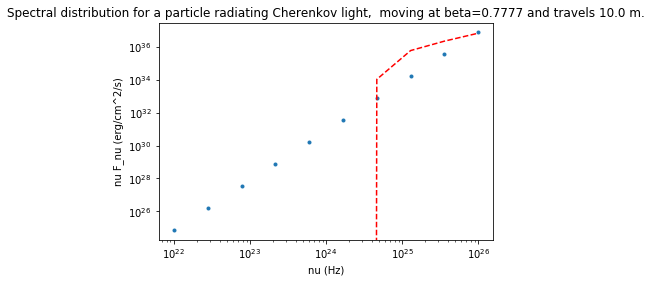

In [5]:
x = v
y = integrand(v,beta)
plt.scatter([x],[y], marker = ".", label = "Cherenkov light for beta=0.7777, L=100 m")
plt.xscale('log')
plt.yscale('log')
#plt.xlim([2e-1,1e4])
#plt.ylim([1e-15,5e-10])
plt.ylabel('nu F_nu (erg/cm^2/s)')
plt.xlabel('nu (Hz)')
plt.title('Spectral distribution for a particle radiating Cherenkov light,  moving at beta=0.7777 and travels 10.0 m.')
# plot the data itself
import pylab
#pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

What's happening lol? 

Now let's focus on making a movie of Cherenkov light from a moving charged particle.

Import packages:

In [221]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

Set up the figure and axes. Line, particle, and circle are the elements we want to animate.

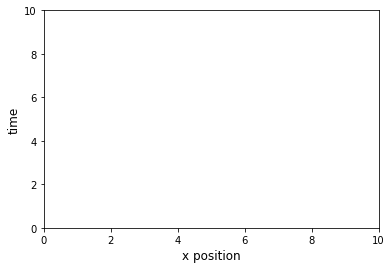

In [222]:
fig, ax = plt.subplots()
Nframes = 100
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))


ax1 = plt.plot()
circ = plt.Circle((5, 5), radius=rad, facecolor="None", edgecolor='k', lw=4)
plt.ylabel('time', fontsize=12)
plt.xlabel('x position', fontsize=12)
particle, = plt.plot([], [], marker='o', ms=10, color='b') #particle

line, = plt.plot([], [], lw=1)
particle, = plt.plot([], [], marker='o', lw=3)
circle, = plt.plot([], [], marker='o', ms=10)

Define intial function. 

In [223]:
def init():
    circle.set_data([], [])
    particle.set_data([], [])
    line.set_data([],[])
    return circle, particle, line,

Insert the motion of Cherenkov light. 

In [224]:
def animate(i):
    t = 2.*np.pi*float(i/(Nframes - 1.))
    x = 1*t
    y = 5
    line.set_data([0,10],[5])
    particle.set_data(x,y)
    rad = 3e8*t
    x_marker =  x*rad
    y_marker = y*rad
    circle.set_data(x_marker, y_marker)
    #all_t = np.linspace(0, 2.*np.pi, Nframes)
    return circle, particle, line,

In [225]:
#Compile
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [226]:
#Display
HTML(anim.to_html5_video())

In [300]:
#Interactive
#HTML(anim.to_jshtml())